<a href="https://colab.research.google.com/github/ahmadryan/MLTSA_RQudsi/blob/master/HW2/KaggledataloadTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import pylab as pl
import glob
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

# data ingestion

In [0]:
# download kaggle economic data
#https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/data#a.us.txt


In [0]:
!pip install kaggle


In [0]:
from google.colab import drive

drive.mount("/content/gdrive")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive/My\ Drive/


/content/gdrive/My Drive


In [0]:
ls kaggle.json


kaggle.json


In [0]:
!chmod 600 kaggle.json

In [0]:
import json
import os
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']


In [0]:
os.environ

environ({'ENV': '/root/.bashrc', 'GCS_READ_CACHE_BLOCK_SIZE_MB': '16', 'CLOUDSDK_CONFIG': '/content/.config', 'CUDA_VERSION': '10.1.243', 'PATH': '/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin', 'HOME': '/root', 'LD_LIBRARY_PATH': '/usr/local/nvidia/lib:/usr/local/nvidia/lib64', 'LANG': 'en_US.UTF-8', 'SHELL': '/bin/bash', 'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs', 'CUDA_PKG_VERSION': '10-1=10.1.243-1', 'SHLVL': '1', 'GCE_METADATA_TIMEOUT': '0', 'NCCL_VERSION': '2.4.8', 'NVIDIA_VISIBLE_DEVICES': 'all', 'TF_FORCE_GPU_ALLOW_GROWTH': 'true', 'DEBIAN_FRONTEND': 'noninteractive', 'CUDNN_VERSION': '7.6.5.32', 'LAST_FORCED_REBUILD': '20200204', 'JPY_PARENT_PID': '18', 'PYTHONPATH': '/env/python', 'DATALAB_SETTINGS_OVERRIDES': '{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\\"172.28.0.2\\""]}', 'NO_GCE_CHECK': 'True', 'GLIBCXX_FORCE_NEW':

In [0]:
#check that it worked by listing the kaggle datasets
!kaggle datasets 


usage: kaggle datasets [-h]
                       {list,files,download,create,version,init,metadata,status}
                       ...
kaggle datasets: error: too few arguments


In [0]:
!kaggle competitions list -s health



ref                                                                deadline             category        reward  teamCount  userHasEntered  
-----------------------------------------------------------------  -------------------  ----------  ----------  ---------  --------------  
hhp                                                                2013-04-04 07:00:00  Featured      $500,000       1351           False  
datasciencebowl                                                    2015-03-16 23:59:00  Featured      $175,000       1049           False  
nfl-big-data-bowl-2020                                             2020-01-06 23:59:00  Featured       $75,000       2038           False  
google-cloud-ncaa-march-madness-2020-division-1-mens-tournament    2020-03-19 15:00:00  Featured       $25,000        222           False  
google-cloud-ncaa-march-madness-2020-division-1-womens-tournament  2020-03-20 15:00:00  Featured       $25,000        139           False  
ultrasound-nerve-seg

In [0]:
!kaggle datasets list -s finance

ref                                                      title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  ------  -------------------  -------------  
cfpb/us-consumer-finance-complaints                      US Consumer Finance Complaints                       84MB  2019-11-14 05:52:29           9335  
danerbland/electionfinance                               Campaign Finance versus Election Results            209KB  2016-12-07 21:14:32           1166  
stefanoleone992/mutual-funds-and-etfs                    US Funds dataset from Yahoo Finance                   4MB  2019-05-04 02:00:37           1734  
rajanand/finance-india                                   Finance ₹ - India                                    25KB  2017-08-27 12:17:02           1289  
chirin/africa-economic-banking-and-systemic-crisis-data  Africa Economic, Banking 

In [0]:
!kaggle datasets list -s stock

ref                                                       title                                              size  lastUpdated          downloadCount  
--------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
borismarjanovic/price-volume-data-for-all-us-stocks-etfs  Huge Stock Market Dataset                         492MB  2017-11-16 14:53:29          49293  
dgawlik/nyse                                              New York Stock Exchange                            31MB  2017-02-22 10:18:25          37445  
camnugent/sandp500                                        S&P 500 stock data                                 19MB  2018-02-10 03:15:53          24569  
aaron7sun/stocknews                                       Daily News for Stock Market Prediction              6MB  2019-11-13 18:22:52          28199  
rpaguirre/tesla-stock-price                               Tesla Stock Price             

In [0]:
!mkdir TESLA

In [0]:
cd TESLA

/content/gdrive/My Drive/TESLA


In [0]:
!mkdir data

In [0]:
cd data

/content/gdrive/My Drive/TESLA/data


In [0]:
!kaggle datasets download timoboz/tesla-stock-data-from-2010-to-2020

  0% 0.00/46.1k [00:00<?, ?B/s]
100% 46.1k/46.1k [00:00<00:00, 6.80MB/s]


In [0]:
!ls

tesla-stock-data-from-2010-to-2020.zip


In [0]:
!unzip tesla-stock-data-from-2010-to-2020.zip

Archive:  tesla-stock-data-from-2010-to-2020.zip
  inflating: TSLA.csv                


In [0]:
# this will be a bit more complicated because you will download a folder and will have to read some files from it.

In [0]:
pd.read_csv("TSLA.csv")

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [0]:
tesla = pd.read_csv("TSLA.csv")

In [0]:
tesla.shape

(2416, 7)

#  data inspection

plot each time series (ts)

In [0]:
tesla.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [0]:
tesla.set_index("Date", inplace=True)

Open
High
Low
Close
Adj Close
Volume


(2416, 6)

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


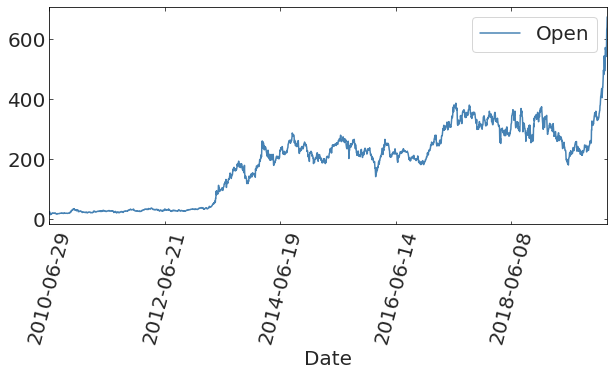

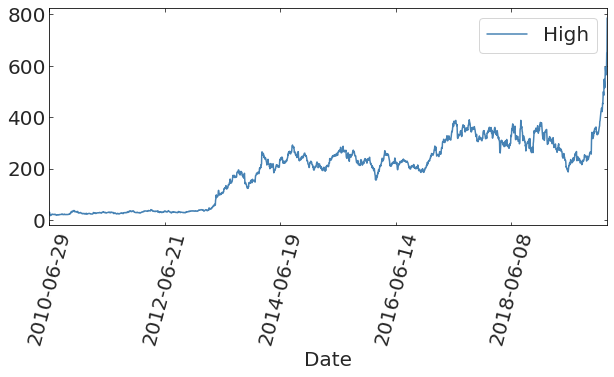

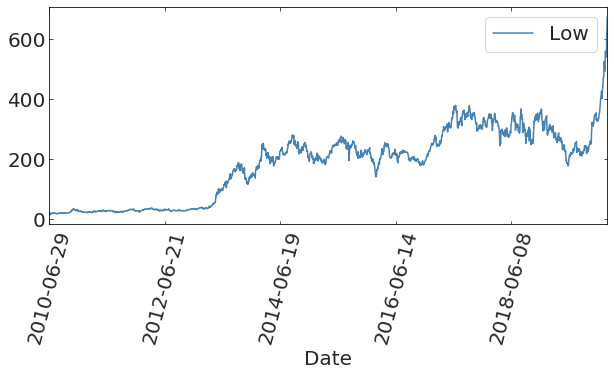

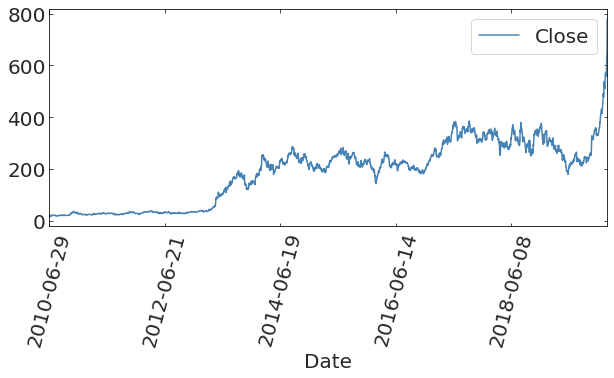

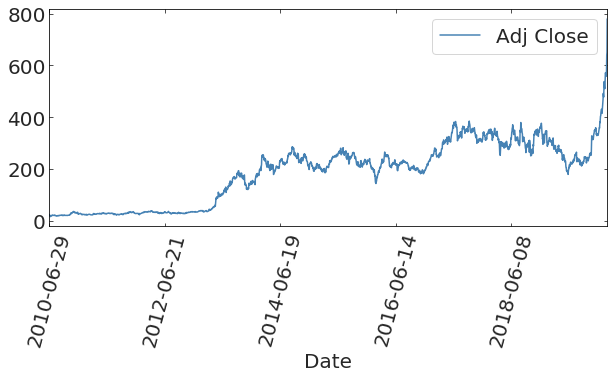

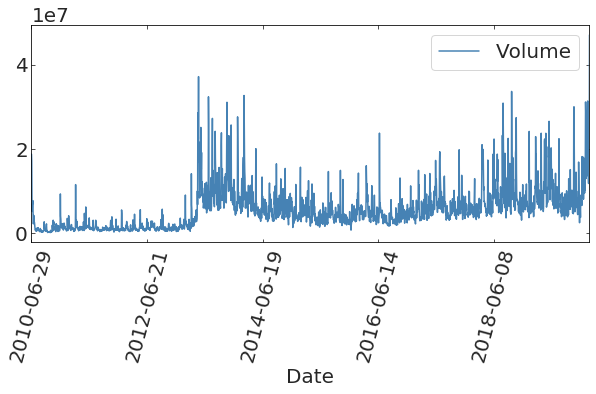

In [0]:
for c in tesla.columns:
    print(c)
    fig, ax = pl.subplots(figsize=(10,4))
    tesla.plot(y=c, ax=ax, rot=75)

tesla.shape

## visualizing correlations

use ```pandas.plotting.scatter_matrix```  to look at the relationship between lightcurves

plot the pairwise correlation as a heatmap using ```pl.imshow()```. You can access the pairwise correlation with the dataframe method ```df.corr()```

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


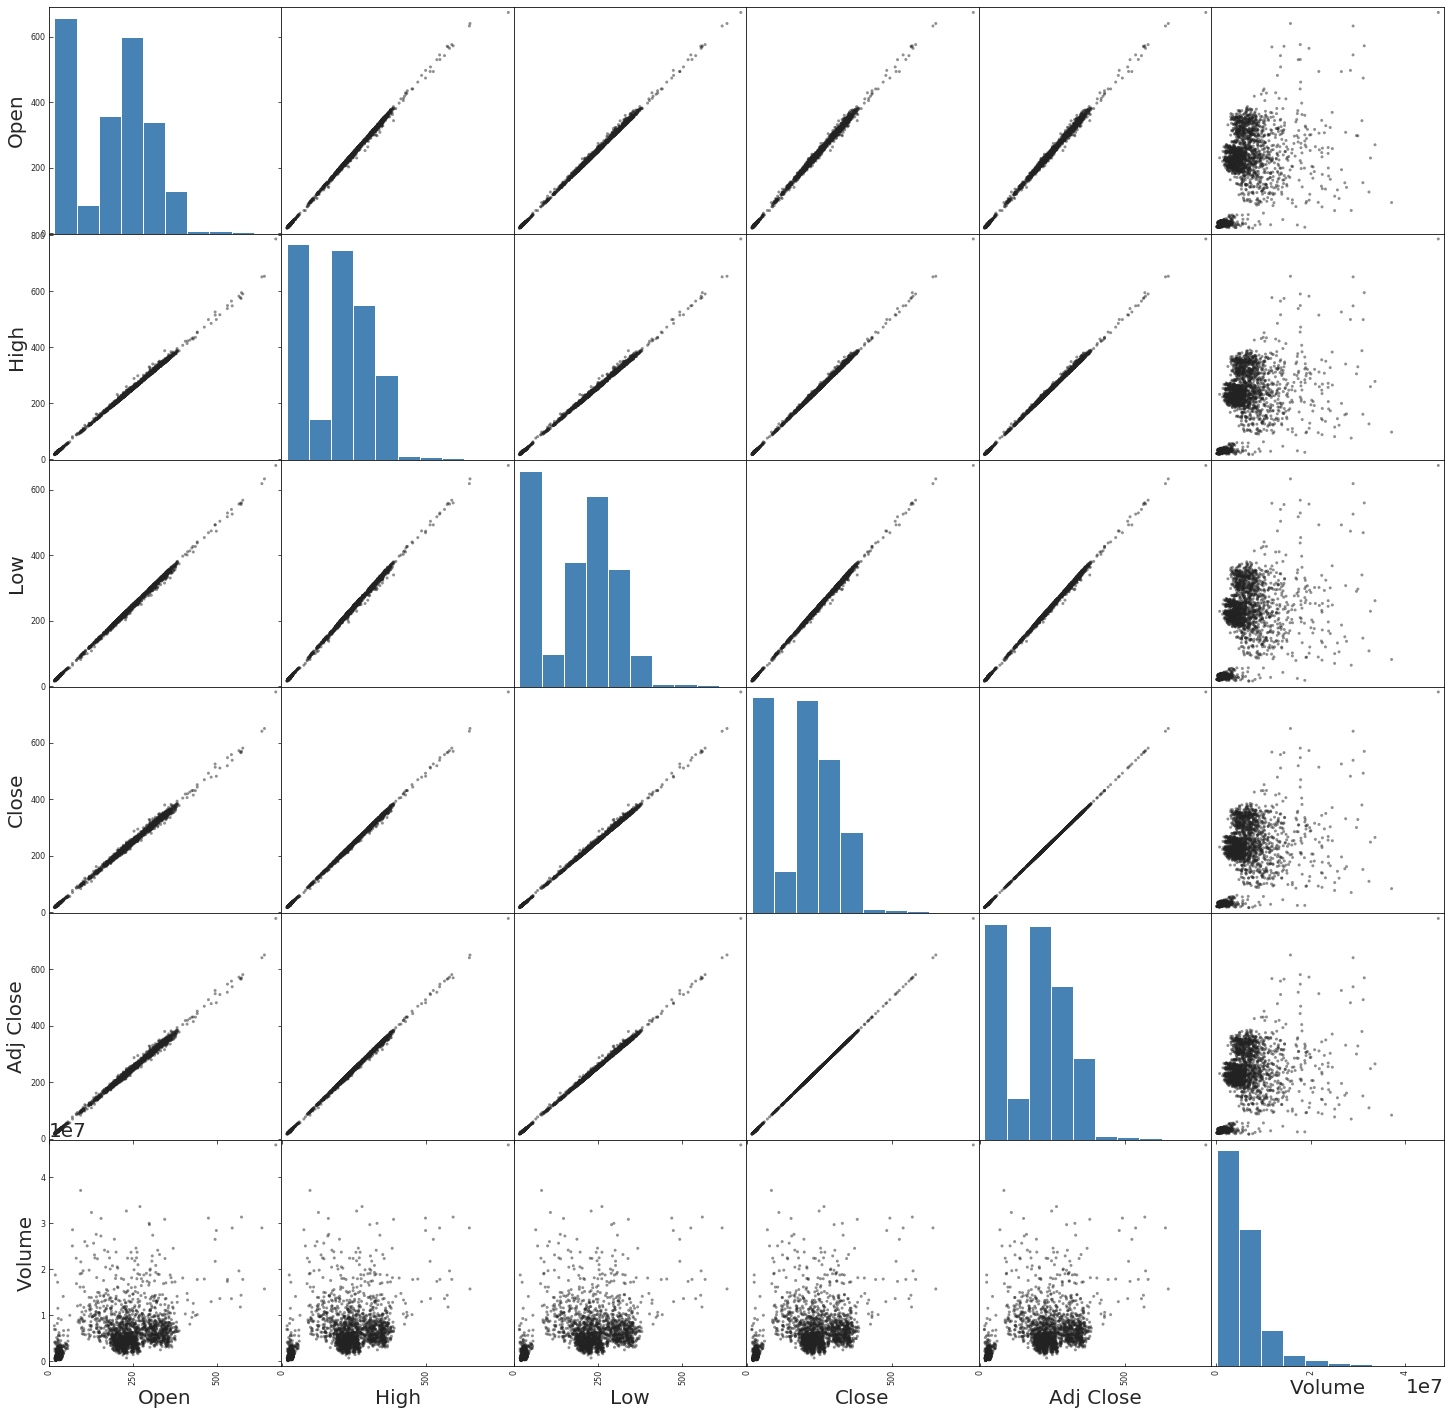

In [0]:
from pandas.plotting import scatter_matrix
scatter_matrix(tesla, figsize=(25,25), color="#222222");

In [0]:
tesla.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999425,0.999575,0.998886,0.998886,0.501762
High,0.999425,1.000000,0.999389,0.999640,0.999640,0.512944
Low,0.999575,0.999389,1.000000,0.999447,0.999447,0.493496
Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Adj Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Volume,0.501762,0.512944,0.493496,0.505169,0.505169,1.000000


NameError: ignored

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


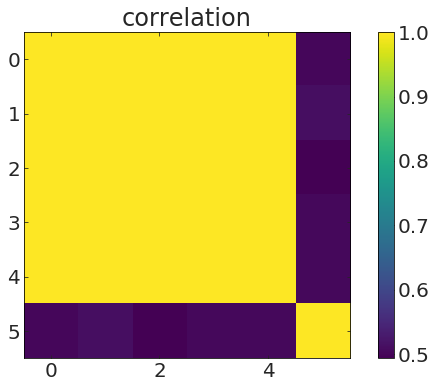

In [0]:
pl.imshow(tesla.corr())
pl.colorbar()
pl.title("correlation")
pl.xticks(range(len(tesla.columns)), tss.columns, rotation=90)
pl.yticks(range(len(tesla.columns)), tss.columns);


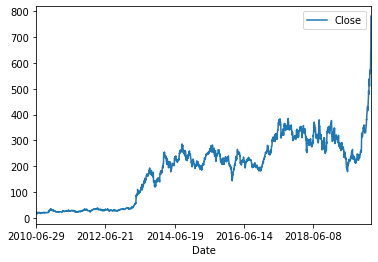

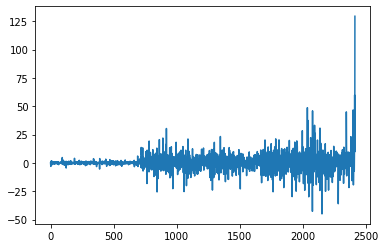

In [0]:
ax = tesla.plot(y="Close")
pl.figure()
pl.plot(tesla.Close.values[1:] - tesla.Close.values[:-1])
